Linear regression is used for finding linear relationship between target and one or more predictors. The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

The Mathematics behind Linear Regression:
\begin{equation*}
\mathbf{X} =  \begin{vmatrix}
1 & .. & X_1m \\
1 & .. & . \\
1 & .. & X_nm \\
\end{vmatrix}
\end{equation*}

\begin{equation*}
\mathbf{\theta} =  \begin{vmatrix}
1 & .. & \theta_n \\
\end{vmatrix}
\end{equation*}

\begin{align}
\dot{Y} & = X\theta \\
\ Cost & = 1/2n\sum((\dot{Y} - Y)^2) \\
\ \theta_j & = \theta_j - \alpha/m\sum((\dot{Y} - Y))*X \\
\end{align}

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
class LinearRegressionImplemented:
    def __init__(self):
        self.theta = None
        self.error = np.float('inf')
        self.costs = np.array([])
    
    def fit(self, X, y, alpha, iterations = 100, iter_result = False):
        X = np.hstack((np.ones((X.shape[0], 1)), X)) #Appending 1 to get the intercept value
        r, c = X.shape
        #initial values of parameters
        theta = np.ones((c, 1)) # initializing theta as a vector of ones.
        for i in range(iterations):
            y_pred = X @ theta # Calculating the predictions according to the first formula.
            c = self.cost(y_pred, y)
            if iter_result: # if iter_result is True, the costs for each iteration will be printed.
                print('Iteration ' + str(i) + ': ' + str(c))
            # adding cost of each iteration to costs variable so that it can be used to plot the cost - iterations graph.
            self.costs = np.append(self.costs, c)
            # updates the theta and error only if cost of current iteration is lower than the saved cost of the model.
            if (c < self.error):
                self.error = c
                self.theta = theta
            theta = self.gradientDescent(X, y_pred, y, theta, alpha)
            
    def cost(self, y_pred, y):
        '''Implementing second formula'''
        diff = (y_pred - y) ** 2
        cost = sum(diff) / 2 * len(diff)
        return cost[0]
    
    def gradientDescent(self, X, y_pred, y, theta, alpha):
        '''Implementing third formula'''
        diff = X.T @ (y_pred - y)
        theta = theta - (alpha / y.shape[0]) * diff
        return theta
    
    def parameters(self):
        '''Returns parameters of trained model along with error'''
        return self.error, self.theta
    
    def plotCost(self):
        plt.plot(self.costs)
        plt.title("Cost vs. Iterations")
    
    def predict(self, X):
        '''Predicts y for the input'''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.theta

Cost: 28.464270685823987
Theta: 
[[1.08242727]
 [1.19424593]]
Predicted Value: [[7.05365692]]


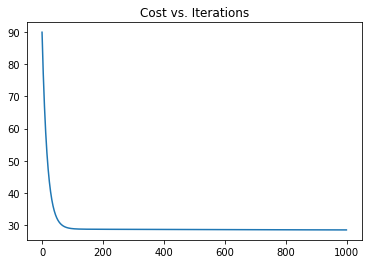

In [87]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1,1)
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]).reshape(-1,1)
z = LinearRegressionImplemented()
z.fit(x, y, 0.001, iter_result = False, iterations = 1000)
a,v = z.parameters()
z.plotCost()

print('Cost: ' + str(a))
print('Theta: \n'  + str(v))
print('Predicted Value: ' + str(z.predict(np.array([5]).reshape(-1,1))))